In [ ]:
%%capture
try:
  already_installed
except:  
    !pip install kora
    !pip install dgl
    !pip install dgl-cu101
    !pip install --pre dgl-cu101
    !pip install dgllife
    # !pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
    # !pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
    # !pip install -q torch-geometric
    !pip install torch_optimizer
    #!pip install pytorch_lightning
    import sys
    import time
    import dgl
    import dgllife
    import torch 
    import pickle
    from IPython.display import clear_output
    import networkx as nx
    import dgl.function as fn
    import torch.nn.functional as F
    import torch.nn as nn
    sys.path.append('/usr/local/lib/python3.6/dist-packages/') # For using RDKit utilizing KORA
    import kora.install.rdkit
    from rdkit import Chem
    from rdkit.Chem import Descriptors
    from rdkit.Chem.Draw import IPythonConsole
    from rdkit.Chem import ChemicalFeatures
    from rdkit import RDConfig
    from dgllife.utils import featurizers as fs
    from torch.utils.data import DataLoader
    import networkx as nx
    import matplotlib.pyplot as plt
    import torch_optimizer as optim
    # import pytorch_lightning as pl  
    # from pytorch_lightning.metrics.classification import AUROC
    # from pytorch_lightning.metrics.classification import AveragePrecision
    # from pytorch_lightning.metrics.classification import Recall
    # from pytorch_lightning.metrics.classification import Precision
    # from pytorch_lightning.metrics.classification import ConfusionMatrix
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import train_test_split
    import pandas as pd
    import numpy as np
    import itertools
    import os
    %matplotlib inline
    import warnings
    warnings.filterwarnings("ignore")
    # Fix Seeds
    # Set a seed value
    seed_value= 213 
    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    os.environ['PYTHONHASHSEED']=str(seed_value)
    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random 
    random.seed(seed_value)
    # 3. Set `numpy` pseudo-random generator at a fixed value
    np.random.seed(seed_value)
    # 4. Set `pytorch` pseudo-random generator at a fixed value
    torch.manual_seed(seed_value)
    # 5. Set `dgl` pseudo-random generator at a fixed value
    dgl.seed(seed_value)
    # 6. For layers that introduce randomness like dropout, make sure to set seed values 
    # model.add(Dropout(0.25, seed=seed_value))
    already_installed=True

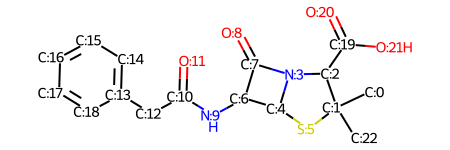

In [ ]:
mol = Chem.MolFromSmiles('CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C')
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()))
    return mol
show_atom_number(mol, 'molAtomMapNumber')

In [ ]:
graph = dgllife.utils.mol_to_bigraph(mol, add_self_loop=False, node_featurizer=None, edge_featurizer=None, canonical_atom_order=True)

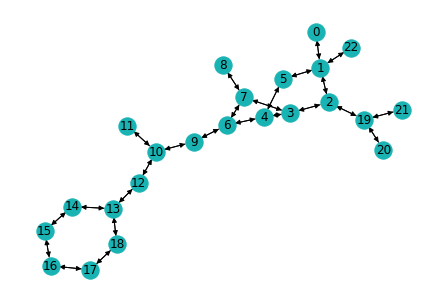

In [ ]:
import networkx as nx
# Since the actual graph is undirected, we convert it for visualization
# purpose.
nx_G = graph.to_networkx()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G, scale=1)
#nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])
nx.draw(nx_G, pos, with_labels=True, node_color=[[.1, .7, .7]])

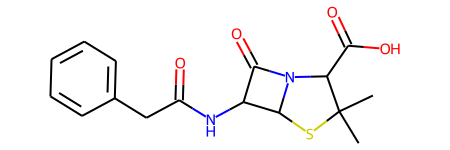

In [ ]:
mol

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
 https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/HIV.csv


In [ ]:
HIV_dataset = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/HIV.csv')#.fillna(0)

In [ ]:
dataset = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/HIV.csv')

In [ ]:
HIV_dataset

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0


In [ ]:
CanonicalBondFeaturizer(Chem.MolFromSmiles(HIV_dataset.smiles[0]))['e'].shape

torch.Size([40, 12])

In [ ]:
CanonicalAtomFeaturizer_without_AF_OH(Chem.MolFromSmiles('[U]'))['h'].shape

torch.Size([1, 128])

In [ ]:
mol = Chem.MolFromSmiles(HIV_dataset.smiles[0])


In [ ]:
Draw.MolToImage(Chem.MolFromSmiles(HIV_dataset.smiles[0]), includeAtomNumbers=True)

NameError: ignored

In [ ]:
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))

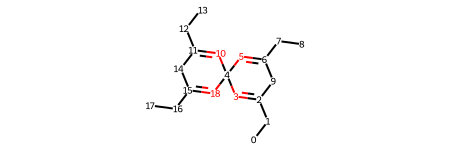

In [ ]:
mol

In [ ]:
mol.GetAtoms(

In [ ]:
mol2 = Chem.AddHs(mol)

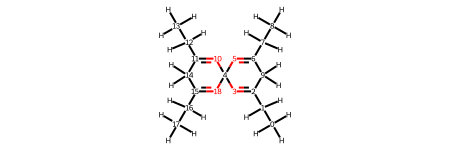

In [ ]:
mol2

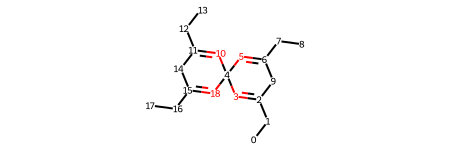

In [ ]:
mol

In [ ]:
HIV_dataset.smiles[0]

In [ ]:
HIV_dataset.smiles[0]

'CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)=[O+]2'

In [ ]:
## Node and Edge Featurizer

def atom_is_in_ring_list_one_hot(atom, allowable_set=None, encode_unknown=False):
          list = [3,4,5] # List denotes the size of cycles
          return [atom.IsInRing()]+[atom.IsInRingSize(i) for i in list]

def bond_is_in_ring_list_one_hot(bond, allowable_set=None, encode_unknown=False):
          list = [3,4,5] # List denotes the size of cycles
          return [bond.IsInRing()]+[bond.IsInRingSize(i) for i in list]

# Same as DMPNN; Not sure about chirlarity
class CanonicalAtomFeaturizer_without_AF_OH(fs.BaseAtomFeaturizer):
    def __init__(self, atom_data_field='h'):
        super().__init__(
            featurizer_funcs={atom_data_field: fs.ConcatFeaturizer(
                [
                 fs.atomic_number_one_hot,
                 fs.atom_degree_one_hot,
                 fs.atom_formal_charge_one_hot,
                 fs.atom_chiral_tag_one_hot,
                 fs.atom_chirality_type_one_hot, 
                 fs.atom_is_chiral_center,
                 fs.atom_total_num_H_one_hot,
                 fs.atom_hybridization_one_hot,
                 fs.atom_is_aromatic,
                 fs.atom_mass,
                 #fs.atom_explicit_valence_one_hot,
                 #fs.atom_implicit_valence_one_hot,                
                 #fs.atom_num_radical_electrons_one_hot,
                 #fs.atom_is_in_ring,
                 #atom_is_in_ring_list_one_hot
                 ]
            )})

# Same as DMPNN
class CanonicalBondFeaturizer(fs.BaseBondFeaturizer):
       def __init__(self, bond_data_field='e', self_loop=False):
        super(CanonicalBondFeaturizer, self).__init__(
            featurizer_funcs={bond_data_field: fs.ConcatFeaturizer(
                [fs.bond_type_one_hot,
                 fs.bond_is_conjugated,
                 fs.bond_is_in_ring,
                 fs.bond_stereo_one_hot,
                 #fs.bond_direction_one_hot,
                 #bond_is_in_ring_list_one_hot
                 ]
            )}, self_loop=self_loop)
        
CanonicalBondFeaturizer = CanonicalBondFeaturizer()
CanonicalAtomFeaturizer = CanonicalAtomFeaturizer_without_AF_OH()

In [ ]:

def atom_is_in_ring_list_one_hot(atom, allowable_set=None, encode_unknown=False):
          list = [3,4,5] # List denotes the size of cycles
          return [atom.IsInRing()]+[atom.IsInRingSize(i) for i in list]

def bond_is_in_ring_list_one_hot(bond, allowable_set=None, encode_unknown=False):
          list = [3,4,5] # List denotes the size of cycles
          return [bond.IsInRing()]+[bond.IsInRingSize(i) for i in list]

# Same as DMPNN; Not sure about chirlarity
class CanonicalAtomFeaturizer_without_AF_OH(fs.BaseAtomFeaturizer):
    def __init__(self, atom_data_field='h'):
        super().__init__(
            featurizer_funcs={atom_data_field: fs.ConcatFeaturizer(
                [
                 fs.atomic_number_one_hot,
                 fs.atom_degree_one_hot,
                 fs.atom_formal_charge_one_hot,
                 fs.atom_chiral_tag_one_hot,
                 fs.atom_chirality_type_one_hot, 
                 fs.atom_is_chiral_center,
                 fs.atom_total_num_H_one_hot,
                 fs.atom_hybridization_one_hot,
                 fs.atom_is_aromatic,
                 fs.atom_mass,
                 #fs.atom_explicit_valence_one_hot,
                 #fs.atom_implicit_valence_one_hot,                
                 #fs.atom_num_radical_electrons_one_hot,
                 #fs.atom_is_in_ring,
                 #atom_is_in_ring_list_one_hot
                 ]
            )})

# Same as DMPNN
class CanonicalBondFeaturizer(fs.BaseBondFeaturizer):
       def __init__(self, bond_data_field='e', self_loop=False):
        super(CanonicalBondFeaturizer, self).__init__(
            featurizer_funcs={bond_data_field: fs.ConcatFeaturizer(
                [fs.bond_type_one_hot,
                 fs.bond_is_conjugated,
                 fs.bond_is_in_ring,
                 fs.bond_stereo_one_hot,
                 #fs.bond_direction_one_hot,
                 #bond_is_in_ring_list_one_hot
                 ]
            )}, self_loop=self_loop)
        
CanonicalBondFeaturizer = CanonicalBondFeaturizer()
CanonicalAtomFeaturizer = CanonicalAtomFeaturizer_without_AF_OH()

class DGLDatasetHIV(torch.utils.data.Dataset):

    def __init__(self):

        HIV_dataset = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz', compression='gzip').fillna(0)
        
        Edge_features=[]
        no_edge=[]
        for i in range(Tox21_dataset.smiles.size):
          try:
            Edge_features.append(CanonicalBondFeaturizer(Chem.MolFromSmiles(Tox21_dataset.smiles[i]))['e'])
          except:
            no_edge.append(i)
            Edge_features.append('no_edge')

        Tox21_dataset.drop(no_edge, inplace=True)

        for i in range(len(no_edge)):
          del Edge_features[no_edge[i]-i]

        %cd /content/

        if not os.path.exists("/content/tox21-global-cdf-rdkit.csv"):
          !unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/TOX21_Node_features_5AF_OH_Yb-solved.zip'
          !unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/tox21-global-cdf-rdkit.zip'
          #!unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/Node_Features_AF3_NOH.zip'

        #global_fetures = torch.Tensor(pd.read_csv('tox21-global-cdf-rdkit.csv').fillna(0).iloc[:,1:].values) # 101 NaN: should be addrressed correctly
        gf_df = pd.read_csv('tox21-global-cdf-rdkit.csv')
        global_fetures = torch.Tensor(gf_df.fillna(gf_df.mean()).iloc[:,1:].values) # 101 NaN; fill mean

        #with open('Node_Features_AF3_NOH.pickle', 'rb') as handle:
        with open('TOX21_Node_features_5AF_OH_Yb-solved.pickle', 'rb') as handle:
            Node_features = pickle.load(handle)
        #Node_features[1910][1][-3] = 1.1 # problem with the atom # # with three additional features
        if torch.isnan(Node_features[1910][1][-5]) == True: # # with five additional features
          Node_features[1910][1][-5] = 1.1

        for i in range(len(no_edge)):
          del Node_features[no_edge[i]-i]

        for i in range(len(no_edge)):
          global_fetures = global_fetures [torch.arange(global_fetures.size (0))!= no_edge[i] - i]

        self.dgl_graphs = []
        for i in range(len(Node_features)):
          mol = Chem.MolFromSmiles(Tox21_dataset.iloc[i,-1])
          self.dgl_graphs.append(dgllife.utils.mol_to_bigraph(mol, canonical_atom_order=False))
          self.dgl_graphs[i].ndata['h_0'] = Node_features[i]
          self.dgl_graphs[i].edata['e_0'] = Edge_features[i]

        self.smiles = []
        for o in range(len(self.dgl_graphs)):
          self.smiles.append(Tox21_dataset.iloc[o,13])
          
        self.global_fetures = global_fetures
        self.labels = Tox21_dataset.iloc[:,:12].values
        self.masks = Tox21_dataset.replace({0: 1}).iloc[:,:12].values        
        
        # # Unzip the dataset and read its csv file, and fill in NaN values with 0
        # self.csv = pd.read_csv(csv_url, compression='gzip').fillna(0) 

        # # Make masks for labels (0 as NaN value, and 1 as other values)
        # self.masks_csv = pd.read_csv(csv_url, compression='gzip').replace({0: 1}).fillna(0)

        # # Split smiles, labels, and masks columns as lists
        # self.smiles = self.csv.iloc[:,13]
        # self.labels = self.csv.iloc[:,:12].values
        # self.masks = self.masks_csv.iloc[:,:12].values 

    def __len__(self):
        return len(self.dgl_graphs)

    def __getitem__(self, idx):
        return  self.smiles[idx], self.dgl_graphs[idx], self.global_fetures[idx], torch.Tensor(self.labels[idx]), torch.Tensor(self.masks[idx])

In [ ]:
CanonicalAtomFeaturizer_without_AF_OH = CanonicalAtomFeaturizer_without_AF_OH()

In [ ]:
Node_features=[]
for i in range(HIV_dataset.shape[0]):
  Node_features.append(CanonicalAtomFeaturizer_without_AF_OH(Chem.MolFromSmiles(HIV_dataset.smiles[i]))['h'])
len(Node_features)

RDKit WARNING: [12:06:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:06:00] WARNING: not removing hydrogen atom without neighbors


41127

In [ ]:
Edge_features=[]
no_edge=[]
for i in range(HIV_dataset.smiles.size):
  try:
    Edge_features.append(CanonicalBondFeaturizer(Chem.MolFromSmiles(HIV_dataset.smiles[i]))['e'])
  except:
    no_edge.append(i)
    Edge_features.append('no_edge')

RDKit WARNING: [12:12:17] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:12:17] WARNING: not removing hydrogen atom without neighbors


In [ ]:
len(no_edge)
 

0

In [ ]:
# OH : One Hot
# NOH : Not One Hot
# AF : Additional Features

def atom_is_in_ring_list_one_hot(atom, allowable_set=None, encode_unknown=False):
          list = [3,4,5] # List denotes the size of cycles
          return [atom.IsInRing()]+[atom.IsInRingSize(i) for i in list]

def bond_is_in_ring_list_one_hot(bond, allowable_set=None, encode_unknown=False):
          list = [3,4,5] # List denotes the size of cycles
          return [bond.IsInRing()]+[bond.IsInRingSize(i) for i in list]

# def additional_atom_features_9(atom, allowable_set=None, encode_unknown=False):
#           return [
#                   element(atom.GetSymbol()).electronegativity(scale='pauling'),
#                   element(atom.GetSymbol()).ionenergies[1],
#                   element(atom.GetSymbol()).dipole_polarizability,
#                   #element(atom.GetSymbol()).ionenergies[2],
#                   element(atom.GetSymbol()).covalent_radius_bragg,
#                   element(atom.GetSymbol()).heat_of_formation,
#                   #element(atom.GetSymbol()).ionic_radius,
#                   element(atom.GetSymbol()).atomic_volume,
#                   element(atom.GetSymbol()).atomic_radius,
#                   element(atom.GetSymbol()).density,
#                   element(atom.GetSymbol()).thermal_conductivity,
#                   #element(atom.GetSymbol()).vdw_radius_truhlar
#                   ]
# def additional_atom_features3(atom, allowable_set=None, encode_unknown=False):
#           return [
#                   element(atom.GetSymbol()).electronegativity(scale='pauling'),
#                   element(atom.GetSymbol()).ionenergies[1],
#                   element(atom.GetSymbol()).dipole_polarizability,
#                   # element(atom.GetSymbol()).covalent_radius_bragg,
#                   # element(atom.GetSymbol()).heat_of_formation,
#                   # #element(atom.GetSymbol()).ionic_radius,
#                   # element(atom.GetSymbol()).atomic_volume,
#                   # element(atom.GetSymbol()).atomic_radius,
#                   # element(atom.GetSymbol()).density,
#                   # element(atom.GetSymbol()).thermal_conductivity,
#                   # #element(atom.GetSymbol()).vdw_radius_truhlar
#                   ]

class CanonicalAtomFeaturizer_without_AF_OH(fs.BaseAtomFeaturizer):
    def __init__(self, atom_data_field='h'):
        super().__init__(
            featurizer_funcs={atom_data_field: fs.ConcatFeaturizer(
                [
                 fs.atomic_number_one_hot,
                 fs.atom_degree_one_hot,
                 fs.atom_explicit_valence_one_hot,
                 fs.atom_implicit_valence_one_hot,
                 fs.atom_hybridization_one_hot,
                 fs.atom_formal_charge_one_hot,
                 fs.atom_num_radical_electrons_one_hot,
                 fs.atom_is_aromatic,
                 fs.atom_total_num_H_one_hot, 
                 fs.atom_is_in_ring,
                 fs.atom_chiral_tag_one_hot,
                 fs.atom_chirality_type_one_hot, 
                 fs.atom_mass,
                 fs.atom_is_chiral_center,
                 atom_is_in_ring_list_one_hot]
            )})

class DGLDatasetHIV(torch.utils.data.Dataset):

    def __init__(self):

        HIV_dataset = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz', compression='gzip').fillna(0)
        
        Edge_features=[]
        no_edge=[]
        for i in range(Tox21_dataset.smiles.size):
          try:
            Edge_features.append(CanonicalBondFeaturizer(Chem.MolFromSmiles(Tox21_dataset.smiles[i]))['e'])
          except:
            no_edge.append(i)
            Edge_features.append('no_edge')

        Tox21_dataset.drop(no_edge, inplace=True)

        for i in range(len(no_edge)):
          del Edge_features[no_edge[i]-i]

        %cd /content/

        if not os.path.exists("/content/tox21-global-cdf-rdkit.csv"):
          !unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/TOX21_Node_features_5AF_OH_Yb-solved.zip'
          !unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/tox21-global-cdf-rdkit.zip'
          #!unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/Node_Features_AF3_NOH.zip'

        #global_fetures = torch.Tensor(pd.read_csv('tox21-global-cdf-rdkit.csv').fillna(0).iloc[:,1:].values) # 101 NaN: should be addrressed correctly
        gf_df = pd.read_csv('tox21-global-cdf-rdkit.csv')
        global_fetures = torch.Tensor(gf_df.fillna(gf_df.mean()).iloc[:,1:].values) # 101 NaN; fill mean

        #with open('Node_Features_AF3_NOH.pickle', 'rb') as handle:
        with open('TOX21_Node_features_5AF_OH_Yb-solved.pickle', 'rb') as handle:
            Node_features = pickle.load(handle)
        #Node_features[1910][1][-3] = 1.1 # problem with the atom # # with three additional features
        if torch.isnan(Node_features[1910][1][-5]) == True: # # with five additional features
          Node_features[1910][1][-5] = 1.1

        for i in range(len(no_edge)):
          del Node_features[no_edge[i]-i]

        for i in range(len(no_edge)):
          global_fetures = global_fetures [torch.arange(global_fetures.size (0))!= no_edge[i] - i]

        self.dgl_graphs = []
        for i in range(len(Node_features)):
          mol = Chem.MolFromSmiles(Tox21_dataset.iloc[i,-1])
          self.dgl_graphs.append(dgllife.utils.mol_to_bigraph(mol, canonical_atom_order=False))
          self.dgl_graphs[i].ndata['h_0'] = Node_features[i]
          self.dgl_graphs[i].edata['e_0'] = Edge_features[i]

        self.smiles = []
        for o in range(len(self.dgl_graphs)):
          self.smiles.append(Tox21_dataset.iloc[o,13])
          
        self.global_fetures = global_fetures
        self.labels = Tox21_dataset.iloc[:,:12].values
        self.masks = Tox21_dataset.replace({0: 1}).iloc[:,:12].values        
        
        # # Unzip the dataset and read its csv file, and fill in NaN values with 0
        # self.csv = pd.read_csv(csv_url, compression='gzip').fillna(0) 

        # # Make masks for labels (0 as NaN value, and 1 as other values)
        # self.masks_csv = pd.read_csv(csv_url, compression='gzip').replace({0: 1}).fillna(0)

        # # Split smiles, labels, and masks columns as lists
        # self.smiles = self.csv.iloc[:,13]
        # self.labels = self.csv.iloc[:,:12].values
        # self.masks = self.masks_csv.iloc[:,:12].values 

    def __len__(self):
        return len(self.dgl_graphs)

    def __getitem__(self, idx):
        return  self.smiles[idx], self.dgl_graphs[idx], self.global_fetures[idx], torch.Tensor(self.labels[idx]), torch.Tensor(self.masks[idx])

In [ ]:
# Data Generation 

def bond_is_in_ring_list_one_hot(bond, allowable_set=None, encode_unknown=False):
          list = [3,4,5] # List denotes the size of cycles
          return [bond.IsInRing()]+[bond.IsInRingSize(i) for i in list]

class CanonicalBondFeaturizer(fs.BaseBondFeaturizer):
       def __init__(self, bond_data_field='e', self_loop=False):
        super(CanonicalBondFeaturizer, self).__init__(
            featurizer_funcs={bond_data_field: fs.ConcatFeaturizer(
                [fs.bond_type_one_hot,
                 fs.bond_is_conjugated,
                 fs.bond_is_in_ring,
                 fs.bond_stereo_one_hot,
                 fs.bond_direction_one_hot,
                 bond_is_in_ring_list_one_hot
                 ]
            )}, self_loop=self_loop)
        
CanonicalBondFeaturizer = CanonicalBondFeaturizer()

# Tox21_dataset = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz', compression='gzip').fillna(0)

# Edge_features=[]
# no_edge=[]
# for i in range(Tox21_dataset.smiles.size):
#   try:
#     Edge_features.append(CanonicalBondFeaturizer(Chem.MolFromSmiles(Tox21_dataset.smiles[i]))['e'])
#   except:
#     no_edge.append(i)
#     Edge_features.append('no_edge')

# Tox21_dataset.drop(no_edge, inplace=True)

# for i in range(len(no_edge)):
#   del Edge_features[no_edge[i]-i]

# %cd /content/

# if not os.path.exists("/content/tox21-global-cdf-rdkit.csv"):
#   !unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/tox21-global-cdf-rdkit.zip'
#   !unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/Node_features_AF_NOH.zip'

# global_fetures = torch.Tensor(pd.read_csv('tox21-global-cdf-rdkit.csv').iloc[:,1:].values)
# with open('Node_features_AF_NOH.pickle', 'rb') as handle:
#     Node_features = pickle.load(handle)
1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.# for i in range(len(no_edge)):
#   del Node_features[no_edge[i]-i]

# for i in range(len(no_edge)):
#   global_fetures = global_fetures [torch.arange(global_fetures.size (0))!= no_edge[i] - i]

class DGLDatasetTox(torch.utils.data.Dataset):

    def __init__(self):

        Tox21_dataset = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz', compression='gzip').fillna(0)
        
        Edge_features=[]
        no_edge=[]
        for i in range(Tox21_dataset.smiles.size):
          try:
            Edge_features.append(CanonicalBondFeaturizer(Chem.MolFromSmiles(Tox21_dataset.smiles[i]))['e'])
          except:
            no_edge.append(i)
            Edge_features.append('no_edge')

        Tox21_dataset.drop(no_edge, inplace=True)

        for i in range(len(no_edge)):
          del Edge_features[no_edge[i]-i]

        %cd /content/

        if not os.path.exists("/content/tox21-global-cdf-rdkit.csv"):
          !unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/TOX21_Node_features_5AF_OH_Yb-solved.zip'
          !unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/tox21-global-cdf-rdkit.zip'
          #!unzip '/content/drive/MyDrive/GMLG_Research/Tox_21_Final/Node_Features_AF3_NOH.zip'

        #global_fetures = torch.Tensor(pd.read_csv('tox21-global-cdf-rdkit.csv').fillna(0).iloc[:,1:].values) # 101 NaN: should be addrressed correctly
        gf_df = pd.read_csv('tox21-global-cdf-rdkit.csv')
        global_fetures = torch.Tensor(gf_df.fillna(gf_df.mean()).iloc[:,1:].values) # 101 NaN; fill mean

        #with open('Node_Features_AF3_NOH.pickle', 'rb') as handle:
        with open('TOX21_Node_features_5AF_OH_Yb-solved.pickle', 'rb') as handle:
            Node_features = pickle.load(handle)
        #Node_features[1910][1][-3] = 1.1 # problem with the atom # # with three additional features
        if torch.isnan(Node_features[1910][1][-5]) == True: # # with five additional features
          Node_features[1910][1][-5] = 1.1

        for i in range(len(no_edge)):
          del Node_features[no_edge[i]-i]

        for i in range(len(no_edge)):
          global_fetures = global_fetures [torch.arange(global_fetures.size (0))!= no_edge[i] - i]

        self.dgl_graphs = []
        for i in range(len(Node_features)):
          mol = Chem.MolFromSmiles(Tox21_dataset.iloc[i,-1])
          self.dgl_graphs.append(dgllife.utils.mol_to_bigraph(mol, canonical_atom_order=False))
          self.dgl_graphs[i].ndata['h_0'] = Node_features[i]
          self.dgl_graphs[i].edata['e_0'] = Edge_features[i]

        self.smiles = []
        for o in range(len(self.dgl_graphs)):
          self.smiles.append(Tox21_dataset.iloc[o,13])
          
        self.global_fetures = global_fetures
        self.labels = Tox21_dataset.iloc[:,:12].values
        self.masks = Tox21_dataset.replace({0: 1}).iloc[:,:12].values        
        
        # # Unzip the dataset and read its csv file, and fill in NaN values with 0
        # self.csv = pd.read_csv(csv_url, compression='gzip').fillna(0) 

        # # Make masks for labels (0 as NaN value, and 1 as other values)
        # self.masks_csv = pd.read_csv(csv_url, compression='gzip').replace({0: 1}).fillna(0)

        # # Split smiles, labels, and masks columns as lists
        # self.smiles = self.csv.iloc[:,13]
        # self.labels = self.csv.iloc[:,:12].values
        # self.masks = self.masks_csv.iloc[:,:12].values 

    def __len__(self):
        return len(self.dgl_graphs)

    def __getitem__(self, idx):
        return  self.smiles[idx], self.dgl_graphs[idx], self.global_fetures[idx], torch.Tensor(self.labels[idx]), torch.Tensor(self.masks[idx])
        
dataset = DGLDatasetTox()

# Train, validation, and test set split
train_set, val_set, test_set = dgllife.utils.ScaffoldSplitter.train_val_test_split(dataset, frac_val=0.1, frac_test=0.1)
#train_set, val_set, test_set = dgllife.utils.RandomSplitter.train_val_test_split(dataset, frac_val=0.1, frac_test=0.1)

def collate(batch):
    # batch is a list of triples (graphs, labels, masks)
    # Concatenate a sequence of graphs
    
    smiles = [e[0] for e in batch]
    
    graphs = [e[1] for e in batch]
    g = dgl.batch(graphs)

    gf = [e[2] for e in batch]
    gf = torch.stack(gf, 0)

    # Concatenate a sequence of tensors (labels) along a new dimension
    labels = [e[3] for e in batch]
    labels = torch.stack(labels, 0)

    # Concatenate a sequence of tensors (masks) along a new dimension
    masks = [e[4] for e in batch]
    masks = torch.stack(masks, 0)

    return smiles, g, gf, labels, masks

def loader(batch_size=64):

    train_dataloader = DataLoader(train_set,
                              batch_size=batch_size,
                              collate_fn=collate,
                              drop_last=False,
                              shuffle=True)

    val_dataloader =  DataLoader(val_set,
                             batch_size=batch_size,
                             collate_fn=collate,
                             drop_last=False,
                             shuffle=False)

    test_dataloader = DataLoader(test_set,
                             batch_size=batch_size,
                             collate_fn=collate,
                             drop_last=False,
                             shuffle=False)
    
    return train_dataloader, val_dataloader, test_dataloader

# borrowed form: https://stackoverflow.com/a/62508086
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
#count_parameters(model)

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

def my_loss(output, label, mask=None):
    criterion = nn.BCELoss(reduction='none')
    if mask == None:
        loss = torch.sum(torch.mean(criterion(output,label), axis=1))
    else: 
        loss = torch.sum(torch.mean(mask*criterion(output,label), axis=1))
    return loss 

def train_model(model, batch_size, optimizer, patience=10, n_epochs=1):
    #metric=AUROC()
    metric = roc_auc_score
    train_dataloader, val_dataloader, test_dataloader  = loader(batch_size)
    train_losses = []
    val_losses = []
    test_aucs = []
    early_stopping = EarlyStopping(patience=patience, verbose=True) # initialize the early_stopping object
    start_time = time.time()
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(1, n_epochs+1):
        epoch_train_loss = 0
        epoch_val_loss = 0
        
        model.train() #Prepare model for training
        for i, (_, mol_dgl_graph, fg, labels, masks) in enumerate(train_dataloader):
            mol_dgl_graph=mol_dgl_graph.to(device)
            labels=labels.to(device)
            masks=masks.to(device)
            fg=fg.to(device)
            prediction = model(mol_dgl_graph, fg)
            loss_train = my_loss(prediction, labels, masks)
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
            epoch_train_loss += loss_train.detach().item()
        epoch_train_loss /= (len(train_set))
        train_losses.append(epoch_train_loss)

        model.eval() #Prepare model for evaluation
        for i, (_, mol_dgl_graph, fg, labels, masks) in enumerate(val_dataloader):
              mol_dgl_graph=mol_dgl_graph.to(device)
              labels=labels.to(device)
              masks=masks.to(device)
              fg=fg.to(device)
              prediction = model(mol_dgl_graph, fg)
              loss_val = my_loss(prediction, labels, masks)
              epoch_val_loss += loss_val.detach().item()
        epoch_val_loss /= (len(val_set))
        
        with torch.no_grad():
          iter = 0
          prediction_all= torch.empty(0, device=device)
          labels_all= torch.empty(0, device=device)
          masks_all= torch.empty(0, device=device)
          for i, (_, mol_dgl_graph, fg, labels, masks) in enumerate(test_dataloader):
              mol_dgl_graph=mol_dgl_graph.to(device)
              labels=labels.to(device)
              masks=masks.to(device)
              fg=fg.to(device)
              prediction = model(mol_dgl_graph, fg)
              prediction_all = torch.cat((prediction_all, prediction), 0)
              labels_all = torch.cat((labels_all, labels), 0)
              masks_all = torch.cat((masks_all, labels), 0)
          average = torch.tensor([0.], device=device)
          for i in range(12):
            #average += metric(prediction_all[:, i].view(-1), labels_all[:, i].view(-1).int()) with pytorch-lightening
            average += metric(labels_all[:, i].view(-1).int().to('cpu'), prediction_all[:, i].view(-1).to('cpu'))
          test_auc = average.item()/12
               
        epoch_len = len(str(n_epochs))
        clear_output()
        print(f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'Train_Loss: {epoch_train_loss:.5f} ' +
                     f'Valid_Loss: {epoch_val_loss:.5f} ' + 
                     f'Test_AUC: {test_auc:.5f}'          
                     )
        '''
        early_stopping needs the validation loss to check if it has decreased, 
        and if it has, it will make a checkpoint of the current model
        '''
        early_stopping(epoch_val_loss, model)
        val_losses.append(epoch_val_loss)
        test_aucs.append(test_auc)
        if early_stopping.early_stop:
            print("Early Stopping")
            break

    print('\n Training Time was', time.time()-start_time, 'seconds in', device)
    model.load_state_dict(torch.load('checkpoint.pt')) #loading the last checkpoint with the best model

    print('\n')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    # Draw lines
    axes[0].plot(range(len(train_losses)), train_losses, '--', color="red",  label="Train loss")
    axes[0].plot(range(len(val_losses)), val_losses, color="green", label="Validation loss")
    # Create plot
    axes[0].set_title("Learning Curve")
    axes[0].set_xlabel("Epoch"), axes[0].set_ylabel("Cross entropy loss"), axes[0].legend(loc="best")
    # Draw lines
    axes[1].plot(range(len(test_aucs)), test_aucs, color="green", label="TEST AUC")
    # Create plot
    axes[1].set_title("TEST AUC During Training")
    axes[1].set_xlabel("Epoch"), axes[1].set_ylabel("TEST AUC"), axes[1].legend(loc="best")
    plt.show()
 
    with torch.no_grad():
        iter = 0
        prediction_all= torch.empty(0, device=device)
        labels_all= torch.empty(0, device=device)
        masks_all= torch.empty(0, device=device)
        for i, (_, mol_dgl_graph, fg, labels, masks) in enumerate(test_dataloader):
            mol_dgl_graph=mol_dgl_graph.to(device)
            labels=labels.to(device)
            masks=masks.to(device)
            fg=fg.to(device)
            prediction = model(mol_dgl_graph, fg)
            prediction_all = torch.cat((prediction_all, prediction), 0)
            labels_all = torch.cat((labels_all, labels), 0)
            masks_all = torch.cat((masks_all, labels), 0)
        average = torch.tensor([0.], device=device)
        for i in range(12):
          #average += metric(prediction_all[:, i].view(-1), labels_all[:, i].view(-1).int()) with pytorch-lightening
          average += metric(labels_all[:, i].view(-1).int().to('cpu'), prediction_all[:, i].view(-1).to('cpu')) 
    print('\n Test AUC is', average.item()/12)

    return  model, train_losses, val_losses, test_aucs 

RDKit WARNING: [08:19:21] WARNING: not removing hydrogen atom without neighbors


/content
Archive:  /content/drive/MyDrive/GMLG_Research/Tox_21_Final/TOX21_Node_features_5AF_OH_Yb-solved.zip
  inflating: TOX21_Node_features_5AF_OH_Yb-solved.pickle  
Archive:  /content/drive/MyDrive/GMLG_Research/Tox_21_Final/tox21-global-cdf-rdkit.zip
  inflating: tox21-global-cdf-rdkit.csv  


RDKit WARNING: [08:19:28] WARNING: not removing hydrogen atom without neighbors


Start initializing RDKit molecule instances...
Creating RDKit molecule instance 1000/7812
Creating RDKit molecule instance 2000/7812


RDKit WARNING: [08:19:36] WARNING: not removing hydrogen atom without neighbors


Creating RDKit molecule instance 3000/7812
Creating RDKit molecule instance 4000/7812
Creating RDKit molecule instance 5000/7812
Creating RDKit molecule instance 6000/7812
Creating RDKit molecule instance 7000/7812
Start computing Bemis-Murcko scaffolds.
Computing Bemis-Murcko for compound 1000/7812
Computing Bemis-Murcko for compound 2000/7812
Computing Bemis-Murcko for compound 3000/7812
Computing Bemis-Murcko for compound 4000/7812
Computing Bemis-Murcko for compound 5000/7812
Computing Bemis-Murcko for compound 6000/7812
Computing Bemis-Murcko for compound 7000/7812
